### Machine Learning (SVM, Logistic Regression, Randon Forest)
### Autism classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:

print("Setup starts...")
# Classification

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 

# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup completed...")


Setup starts...
Setup completed...


In [62]:
asd = pd.read_csv("data/Toddler Autism dataset July 2018.csv")
print("Dataset loaded...")

Dataset loaded...


In [63]:
asd.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [64]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [69]:
asd.shape

(1054, 19)

In [39]:
asd.drop('Qchat-10-Score', axis = 1, inplace = True)
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)

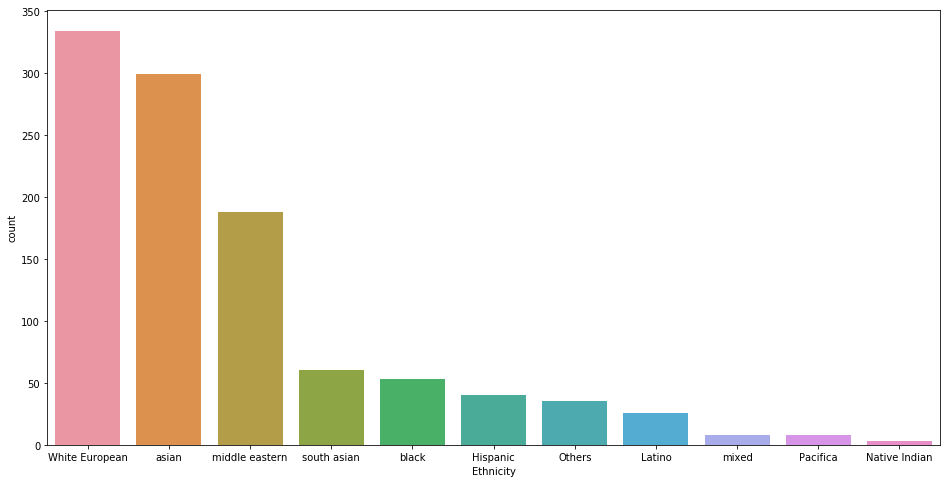

In [67]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = asd, order = asd['Ethnicity'].value_counts().index)

In [41]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [42]:
X = asd.drop(['Class/ASD Traits '], axis = 1)
Y = asd['Class/ASD Traits ']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [80]:
models = []
models.append(('Support Vector Machine:      ', SVC()))
models.append(('Random Forest:               ', RandomForestRegressor()))
models.append(('Logistic Regression:         ', LogisticRegression()))

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

Support Vector Machine:       0.9337539432176656
Random Forest:                0.8201892744479495
Logistic Regression:          0.9747634069400631


In [83]:
param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search_SVC = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores_SVC = cross_val_score(
    estimator=grid_search_SVC,
    X=x_test,
    y=y_test,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0),
    scoring='f1',
    n_jobs=-1
)

In [84]:
scores_SVC.mean()*100

93.48630924758018

In [56]:
#Fine tuning SVC parameters
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

#print('SVC paramters tuning starts...')
clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(x_train, y_train)
clf.best_params_
#print('SVC paramters tuning finished...')

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=linear .................................
[CV] .................. C=0.1, gamma=1.3, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1.3, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=0.8, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=0.8, gamma=1.4, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=0.9, kernel=rbf ....................................
[CV] .

[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=0.9, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=0.9, gamma=1.2, kernel=rbf ....................................
[CV] .

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] ....................... C=1, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1.3, kernel=rbf ......................................
[CV] .

[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.1, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.1, gamma=1.4, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=0.9, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=0.9, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] ..................... C=1.2, gamma=1.2, kernel=rbf, total=   0.0s
[CV] C=1.2, gamma=1.2, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] ....................... C=1.3, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] ..................... C=1.3, gamma=1.3, kernel=rbf, total=   0.0s
[CV] C=1.3, gamma=1.3, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=0.8, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=0.8, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.1, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.1, kernel=rbf ....................................
[CV] .

[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] ..................... C=1.4, gamma=1.4, kernel=rbf, total=   0.0s
[CV] C=1.4, gamma=1.4, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:   44.4s finished


{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

In [57]:
# Re-running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

1.0


In [87]:
#Fine tuning Random Forest Classifier 
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [88]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [89]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [90]:
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9558359621451105


In [51]:
#Logistic Regression
print ('Tuning starts...')
param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=x_test,
    y=y_test,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)
print ('Tuning finished...')

Tuning starts...
Tuning finished...


In [52]:
scores.mean()*100

98.20060687051517